# Data Visualization Lab

The dataset will e presented to you in the form of a RDBMS.

Use SQL queries to extract the data.

##  How to work with database

In [3]:
import requests

In [12]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'

response = requests.get(url)

# save the file to the local system
with open('m4_survey_data.sqlite', 'wb') as file:
    file.write(response.content)

print('File downloaded successfully')

File downloaded successfully


### Connect to the database

In [14]:
import sqlite3
conn = sqlite3.connect('m4_survey_data.sqlite')

### Import pandas module

In [16]:
import pandas as pd

## How to run an sql query

In [18]:
# print how many rows are there in the table named 'master'
QUERY = """ 
SELECT COUNT(*) FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## How to list all tables

In [20]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM 
sqlite_master WHERE
type = 'table'
"""

pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [21]:
QUERY = '''
SELECT * FROM DevType
'''

df_env = pd.read_sql_query(QUERY, conn)

In [22]:
df_env['DevType'].value_counts().idxmax()

'Developer, full-stack'

## How to describe a table 

In [24]:
table_name = 'master' # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name = '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data

### Histograms
Plot a histogram of `ConvertedComp`

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
QUERY = """
SELECT * FROM master
"""

df = pd.read_sql_query(QUERY, conn)
df

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


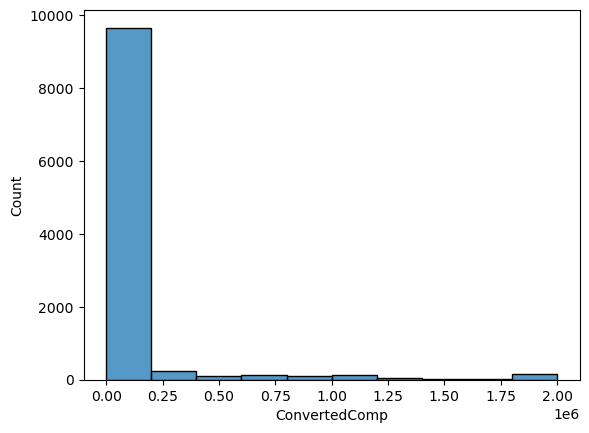

In [28]:
sns.histplot(df['ConvertedComp'], bins = 10)
plt.show()

Plot a box plot of `Age`

<Axes: ylabel='Age'>

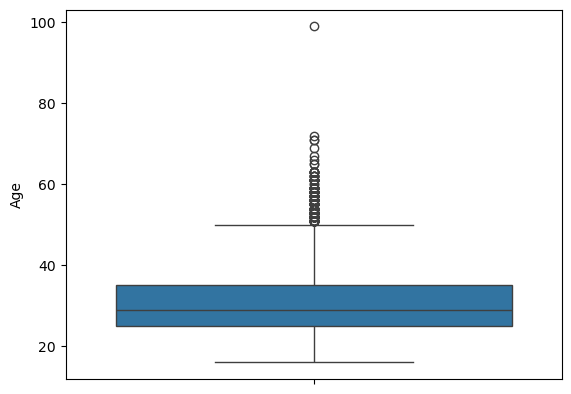

In [30]:
sns.boxplot(df['Age'])

## Visualizing relationships in data

### Scatter Plots

Create a scatter plot of `Age` and `WorkWeekHrs`.

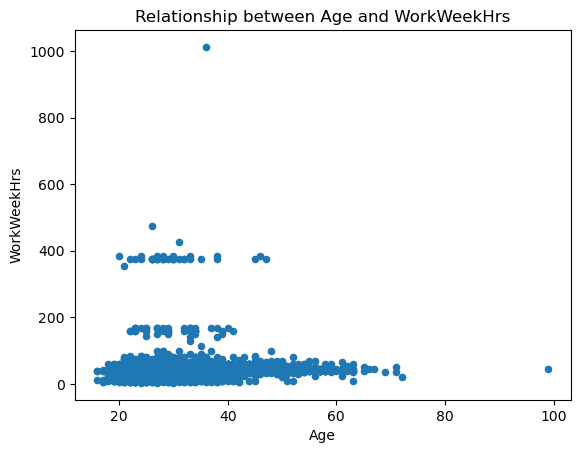

In [32]:
df.plot(kind='scatter',
        x = 'Age',
        y = 'WorkWeekHrs')

plt.title('Relationship between Age and WorkWeekHrs')
plt.show()

### Bubble Plots
Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.

In [34]:
norm_age = (df['Age'] - df['Age'].min())/ (df['Age'].max() - df['Age'].min())

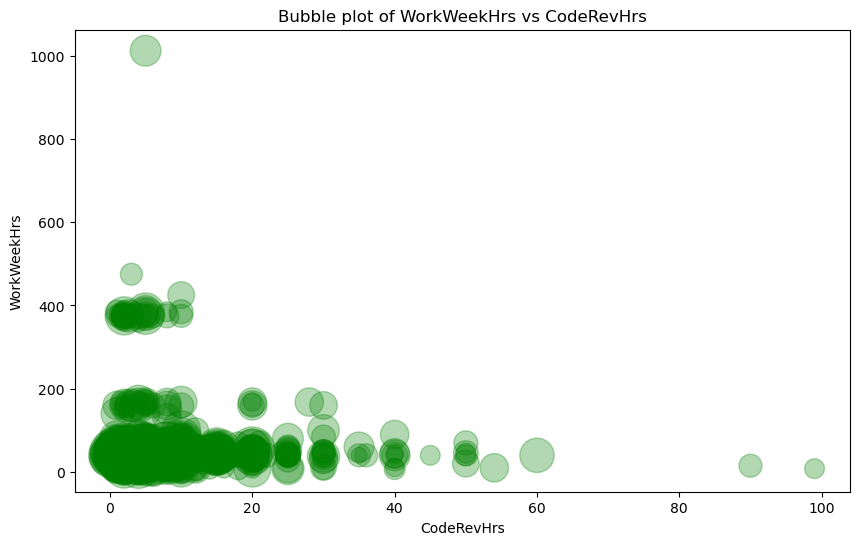

In [35]:
df.plot(kind = 'scatter',
        x = 'CodeRevHrs',
        y = 'WorkWeekHrs',
        alpha = 0.3,
        color = 'green',
        s = norm_age * 2000 + 10,
        figsize = (10,6)
       )

plt.title('Bubble plot of WorkWeekHrs vs CodeRevHrs')
plt.show()

## Visualizing composition of data

### Pie Charts

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.

In [37]:
# Get data from the table containing the database desire for next year
QUERY = '''
SELECT * FROM DatabaseDesireNextYear
'''
df_database = pd.read_sql_query(QUERY, conn)

In [38]:
df_database

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


In [39]:
df_db = df_database.groupby('DatabaseDesireNextYear')['Respondent'].count()

In [40]:
df_db = pd.DataFrame(df_db).reset_index()

In [41]:
df_db

,DatabaseDesireNextYear,Respondent
0,Cassandra,1003
1,Couchbase,390
2,DynamoDB,1044
3,Elasticsearch,2856
4,Firebase,1650
5,MariaDB,1385
6,Microsoft SQL Server,2706
7,MongoDB,3649
8,MySQL,3281
9,Oracle,870


In [42]:
# Sort the data in ascending order
top_db = df_db.sort_values(by='Respondent', ascending = False)

In [43]:
# Create a variable with only the top 5 databases
top5_db = top_db.head(5) 

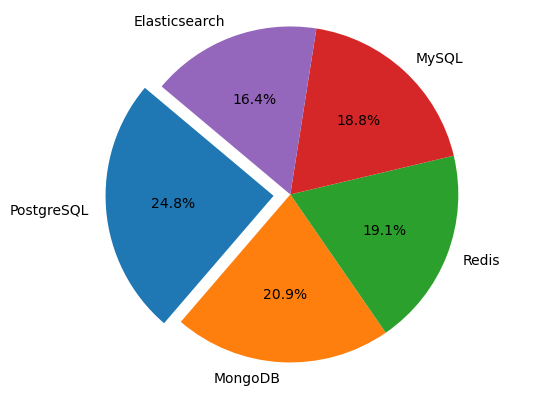

In [44]:
plt.pie(top5_db['Respondent'],
        labels = top5_db['DatabaseDesireNextYear'],
       autopct = '%1.1f%%',
       startangle = 140,
       explode = (0.1, 0,0,0,0))

plt.axis('equal')
plt.show()

### List the most popular languages respondents wish to learn next year.
What is the rank of Python?

In [46]:
QUERY = '''
SELECT * FROM LanguageDesireNextYear
'''
df_pr = pd.read_sql_query(QUERY, conn)

In [47]:
df_pr

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell
...,...,...
55759,25142,Bash/Shell/PowerShell
55760,25142,C
55761,25142,C++
55762,25142,Python


In [48]:
df_L = df_pr.groupby('LanguageDesireNextYear')['Respondent'].count()

In [49]:
df_L = pd.DataFrame(df_L).reset_index()

In [50]:
df_P = df_L.sort_values(by = 'Respondent', ascending = True)

In [51]:
df_P.tail()

,LanguageDesireNextYear,Respondent
25,TypeScript,4088
22,SQL,5012
18,Python,5239
11,HTML/CSS,5328
13,JavaScript,6630


 How many respondents indicated that they work on 'MySQL' only? 

In [53]:
QUERY = '''
SELECT * FROM DatabaseWorkedWith
'''

df_DB = pd.read_sql_query(QUERY, conn)

In [54]:
db_count = df_DB.groupby('DatabaseWorkedWith')['Respondent'].count()

In [55]:
db_count

DatabaseWorkedWith
Cassandra                397
Couchbase                250
DynamoDB                 831
Elasticsearch           1954
Firebase                1314
MariaDB                 1709
Microsoft SQL Server    4110
MongoDB                 3016
MySQL                   5469
Oracle                  1744
Other(s):                728
PostgreSQL              4097
Redis                   2508
SQLite                  3248
Name: Respondent, dtype: int64

### Stacked Charts
Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35

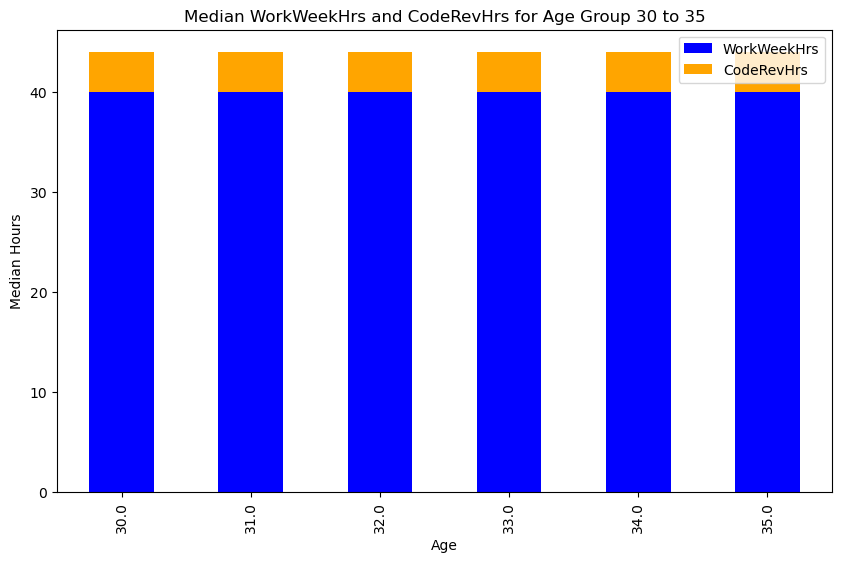

In [57]:
age_filtered = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Group by age and calculate the median for WorkWeekHrs and CodeRevHrs
median_data = age_filtered.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

# Plot the stacked bar chart
median_data.plot(kind='bar', stacked = True, color=['blue', 'orange'],
                 figsize=(10,6))

# Add labels and title
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.ylabel('Median Hours')
plt.xlabel('Age')
plt.show()

In [58]:

# Filter the DataFrame for the age group 30 to 35
age_group = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculate the median for WorkWeekHrs and CodeRevHrs
median_workweekhrs = age_group['WorkWeekHrs'].median()
median_coderevhrs = age_group['CodeRevHrs'].median()

# Create a Datagrame with the meidain values
median_data = pd.DataFrame({'Median': [median_workweekhrs, median_coderevhrs]
                           }, index = ['WorkWeekHrs', 'CodeRevHrs'])


In [59]:
median_data

,Median
WorkWeekHrs,40.0
CodeRevHrs,4.0


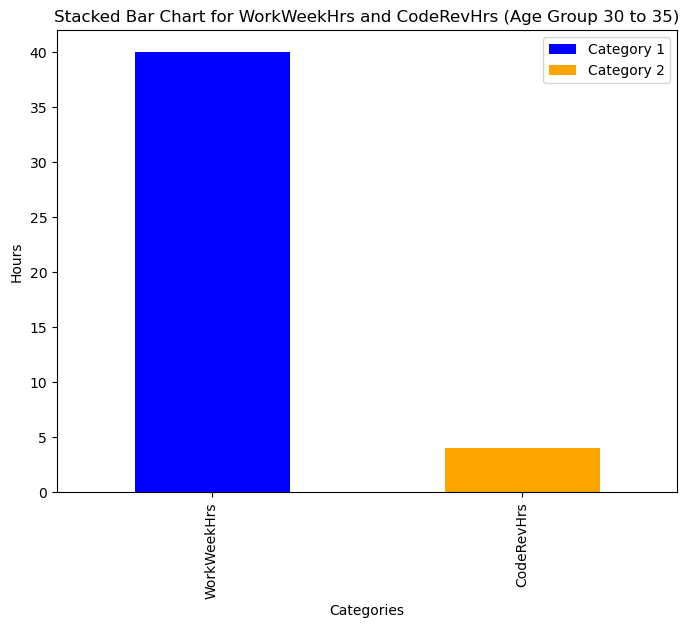

In [60]:
# Sample data where stacking is more visible
median_data_stacked = pd.DataFrame({
    'Category 1': [median_workweekhrs, 0],
    'Category 2': [0, median_coderevhrs]
}, index=['WorkWeekHrs', 'CodeRevHrs'])

# Plot a stacked bar chart
median_data_stacked.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(8, 6))

# Add labels and title
plt.title('Stacked Bar Chart for WorkWeekHrs and CodeRevHrs (Age Group 30 to 35)')
plt.ylabel('Hours')
plt.xlabel('Categories')

# Show the chart
plt.show()


## Visualizing comparison of data

### Line Chart
Plot the median `ConvertedComp` for all ages from 45 to 60

In [71]:
age_group = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

In [73]:
line_chart = age_group.groupby('Age')['ConvertedComp'].median()

<Axes: xlabel='Age'>

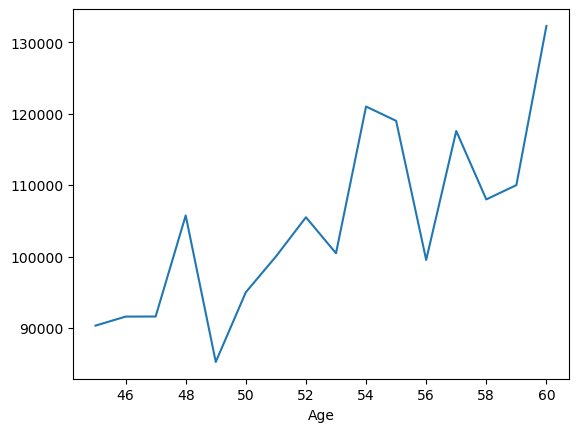

In [75]:
line_chart.plot(kind = 'line',
               x = 'Age',
               y = 'ConvertedComp')

Plot the median `ConvertedComp` for all ages from 25 to 30 

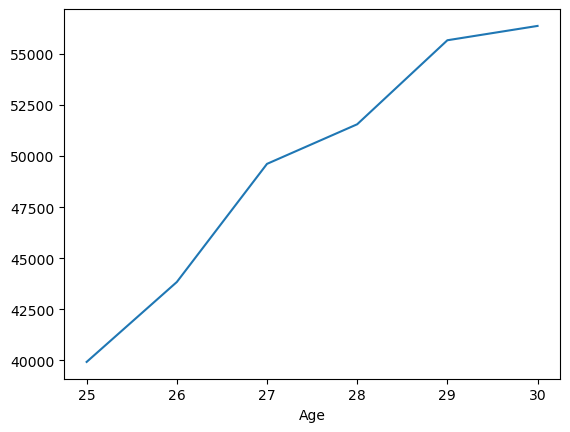

In [67]:
age_group = df[(df['Age'] >= 25) & (df['Age'] <= 30)]

line_chart = age_group.groupby('Age')['ConvertedComp'].median()

#plot
line_chart.plot(kind = 'line', x = 'Age', y = 'ConvertedComp')
plt.show()

### Bar Chart
Create a horizoontal bar chart using column `MainBranch`.

In [79]:
main_vc = df['MainBranch'].value_counts()

<Axes: ylabel='MainBranch'>

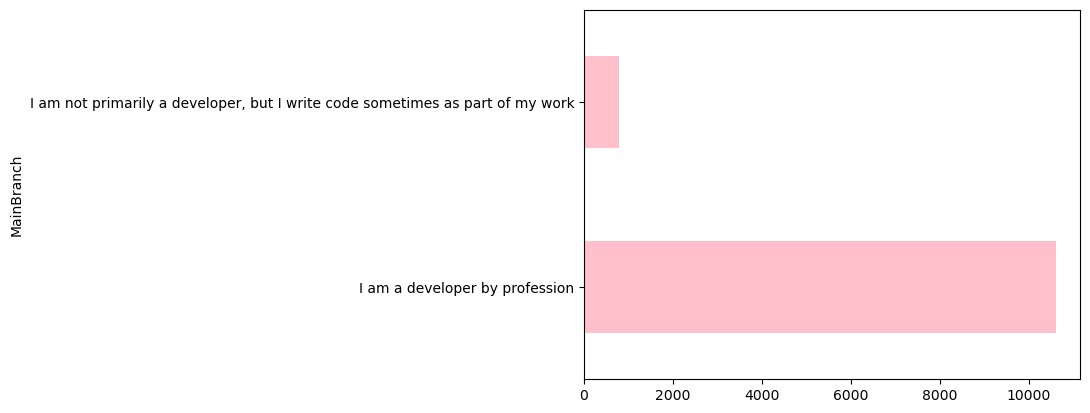

In [81]:
main_vc.plot(kind='barh', color = 'pink')

Close the database connection.

In [84]:
conn.close()